In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import plotly_express as px
pd.options.display.max_columns=None
pd.options.display.max_rows=None

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
data =pd.read_csv('houses_Madrid.csv',encoding='latin-1')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  latitude                      0 non-null      float64
 11  longitude                     0 non-null      float64
 12  raw_address                   16277 non-null  object 
 13  i

Explor

In [4]:
data.duplicated().sum()

0

In [5]:
data.isnull().sum()

Unnamed: 0                          0
id                                  0
title                               0
subtitle                            0
sq_mt_built                       126
sq_mt_useful                    13514
n_rooms                             0
n_bathrooms                        16
n_floors                        20305
sq_mt_allotment                 20310
latitude                        21742
longitude                       21742
raw_address                      5465
is_exact_address_hidden             0
street_name                      5905
street_number                   15442
portal                          21742
floor                            2607
is_floor_under                   1170
door                            21742
neighborhood_id                     0
operation                           0
rent_price                          0
rent_price_by_area              21742
is_rent_price_known                 0
buy_price                           0
buy_price_by

In [6]:
data=data.dropna(axis=1,how='all')

In [7]:
data.isnull().sum()

Unnamed: 0                          0
id                                  0
title                               0
subtitle                            0
sq_mt_built                       126
sq_mt_useful                    13514
n_rooms                             0
n_bathrooms                        16
n_floors                        20305
sq_mt_allotment                 20310
raw_address                      5465
is_exact_address_hidden             0
street_name                      5905
street_number                   15442
floor                            2607
is_floor_under                   1170
neighborhood_id                     0
operation                           0
rent_price                          0
is_rent_price_known                 0
buy_price                           0
buy_price_by_area                   0
is_buy_price_known                  0
house_type_id                     391
is_renewal_needed                   0
is_new_development                992
built_year  

In [8]:
data.columns

Index(['Unnamed: 0', 'id', 'title', 'subtitle', 'sq_mt_built', 'sq_mt_useful',
       'n_rooms', 'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'raw_address',
       'is_exact_address_hidden', 'street_name', 'street_number', 'floor',
       'is_floor_under', 'neighborhood_id', 'operation', 'rent_price',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift',
       'is_exterior', 'has_garden', 'has_pool', 'has_terrace', 'has_balcony',
       'has_storage_room', 'is_accessible', 'has_green_zones',
       'energy_certificate', 'has_parking', 'is_parking_included_in_price',
       'parking_price', 'is_orientation_north', 'is_orientation_west',
       'is_orientation_south', 'is_orientation_east'],
      dtype='object')

In [9]:
df=data[['id','subtitle','sq_mt_built','n_rooms', 'n_bathrooms','buy_price', 'buy_price_by_area','built_year','rent_price']]

In [10]:
df.head(5)

,id,subtitle,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,built_year,rent_price
0,21742,"San CristÃ³bal, Madrid",64.0,2,1.0,85000,1328,1960.0,471
1,21741,"Los Ãngeles, Madrid",70.0,3,1.0,129900,1856,NaN,666
2,21740,"San AndrÃ©s, Madrid",94.0,2,2.0,144247,1535,NaN,722
3,21739,"San AndrÃ©s, Madrid",64.0,2,1.0,109900,1717,1955.0,583
4,21738,"Los Rosales, Madrid",108.0,2,2.0,260000,2407,2003.0,1094


In [11]:
df.rename(columns={'subtitle':'city'},inplace=True)

C:\Users\sch\AppData\Local\Temp\ipykernel_8908\3866691226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'subtitle':'city'},inplace=True)


In [12]:
df.sample(4)


,id,city,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,built_year,rent_price
11245,10497,"Gaztambide, Madrid",376.0,5,4.0,1700000,4521,1955.0,-9067
6733,15009,"Moncloa, Madrid",95.0,2,2.0,439000,4621,1997.0,1528
20860,882,"Chopera, Madrid",75.0,2,1.0,243000,3240,NaN,1047
13507,8235,"Pueblo Nuevo, Madrid",58.0,2,1.0,164000,2828,NaN,795


In [13]:
   df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21742 non-null  int64  
 1   city               21742 non-null  object 
 2   sq_mt_built        21616 non-null  float64
 3   n_rooms            21742 non-null  int64  
 4   n_bathrooms        21726 non-null  float64
 5   buy_price          21742 non-null  int64  
 6   buy_price_by_area  21742 non-null  int64  
 7   built_year         10000 non-null  float64
 8   rent_price         21742 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 1.5+ MB


In [14]:
df.n_rooms.describe()

count    21742.000000
mean         3.005749
std          1.510497
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         24.000000
Name: n_rooms, dtype: float64

In [15]:
df.drop(df.index[df.n_rooms==0],axis=0,inplace=True)

C:\Users\sch\AppData\Local\Temp\ipykernel_8908\2826541533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.index[df.n_rooms==0],axis=0,inplace=True)


In [16]:
df.sample(10)

,id,city,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,built_year,rent_price
11480,10262,"Trafalgar, Madrid",204.0,7,2.0,810000,3971,1991.0,2352
8772,12970,"La Paz, Madrid",55.0,1,1.0,219999,4000,1983.0,979
256,21486,"Villaverde, Madrid",75.0,3,2.0,132000,1760,1961.0,674
20214,1528,"Acacias, Madrid",48.0,2,1.0,215000,4479,NaN,964
18702,3040,"LavapiÃ©s-Embajadores, Madrid",165.0,2,2.0,839000,5085,NaN,2400
15922,5820,"Comillas, Madrid",69.0,2,1.0,199000,2884,1960.0,913
910,20832,"Ambroz, Madrid",65.0,3,1.0,135000,2077,NaN,686
10937,10805,"Trafalgar, Madrid",68.0,2,1.0,510000,7500,NaN,1689
15954,5788,"Buena Vista, Madrid",86.0,3,1.0,127000,1477,1969.0,654
15750,5992,"ChamartÃ­n, Madrid",275.0,3,3.0,2500000,9091,NaN,-104074


In [17]:
df.n_bathrooms.mode()

0    1.0
Name: n_bathrooms, dtype: float64

<Axes: >

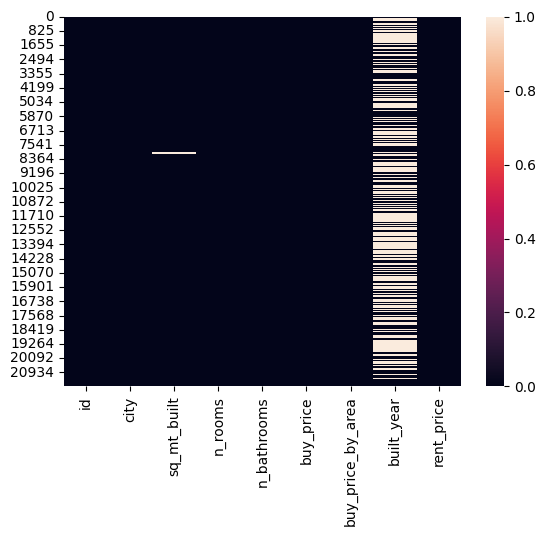

In [18]:
sns.heatmap(df.isnull())

In [19]:
df.n_bathrooms=df.n_bathrooms.fillna(1)
df.n_bathrooms=df.n_bathrooms.replace(0,1)



C:\Users\sch\AppData\Local\Temp\ipykernel_8908\2043760341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.n_bathrooms=df.n_bathrooms.fillna(1)
C:\Users\sch\AppData\Local\Temp\ipykernel_8908\2043760341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.n_bathrooms=df.n_bathrooms.replace(0,1)


In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
df.isnull().sum()

id                       0
city                     0
sq_mt_built            126
n_rooms                  0
n_bathrooms              0
buy_price                0
buy_price_by_area        0
built_year           11517
rent_price               0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21303 entries, 0 to 21741
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21303 non-null  int64  
 1   city               21303 non-null  object 
 2   sq_mt_built        21177 non-null  float64
 3   n_rooms            21303 non-null  int64  
 4   n_bathrooms        21303 non-null  float64
 5   buy_price          21303 non-null  int64  
 6   buy_price_by_area  21303 non-null  int64  
 7   built_year         9786 non-null   float64
 8   rent_price         21303 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 1.6+ MB


In [23]:
df.n_bathrooms=df.n_bathrooms.astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21303 entries, 0 to 21741
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21303 non-null  int64  
 1   city               21303 non-null  object 
 2   sq_mt_built        21177 non-null  float64
 3   n_rooms            21303 non-null  int64  
 4   n_bathrooms        21303 non-null  int32  
 5   buy_price          21303 non-null  int64  
 6   buy_price_by_area  21303 non-null  int64  
 7   built_year         9786 non-null   float64
 8   rent_price         21303 non-null  int64  
dtypes: float64(2), int32(1), int64(5), object(1)
memory usage: 1.5+ MB


In [25]:
df.dropna(subset='sq_mt_built',inplace=True)

In [26]:
df.isnull().sum()

id                       0
city                     0
sq_mt_built              0
n_rooms                  0
n_bathrooms              0
buy_price                0
buy_price_by_area        0
built_year           11445
rent_price               0
dtype: int64

In [27]:
df.head(5)

,id,city,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,built_year,rent_price
0,21742,"San CristÃ³bal, Madrid",64.0,2,1,85000,1328,1960.0,471
1,21741,"Los Ãngeles, Madrid",70.0,3,1,129900,1856,NaN,666
2,21740,"San AndrÃ©s, Madrid",94.0,2,2,144247,1535,NaN,722
3,21739,"San AndrÃ©s, Madrid",64.0,2,1,109900,1717,1955.0,583
4,21738,"Los Rosales, Madrid",108.0,2,2,260000,2407,2003.0,1094


In [28]:
df.isnull().sum()

id                       0
city                     0
sq_mt_built              0
n_rooms                  0
n_bathrooms              0
buy_price                0
buy_price_by_area        0
built_year           11445
rent_price               0
dtype: int64

In [29]:
for value in df.rent_price.values:
    if value < 0:
        df.rent_price=0

In [30]:
df[df.rent_price < 0]

,id,city,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,built_year,rent_price


In [31]:
df['country']=df.city.str.split(',',expand=True)[0]

In [32]:
df.head(5)

,id,city,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,built_year,rent_price,country
0,21742,"San CristÃ³bal, Madrid",64.0,2,1,85000,1328,1960.0,0,San CristÃ³bal
1,21741,"Los Ãngeles, Madrid",70.0,3,1,129900,1856,NaN,0,Los Ãngeles
2,21740,"San AndrÃ©s, Madrid",94.0,2,2,144247,1535,NaN,0,San AndrÃ©s
3,21739,"San AndrÃ©s, Madrid",64.0,2,1,109900,1717,1955.0,0,San AndrÃ©s
4,21738,"Los Rosales, Madrid",108.0,2,2,260000,2407,2003.0,0,Los Rosales


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21177 entries, 0 to 21741
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21177 non-null  int64  
 1   city               21177 non-null  object 
 2   sq_mt_built        21177 non-null  float64
 3   n_rooms            21177 non-null  int64  
 4   n_bathrooms        21177 non-null  int32  
 5   buy_price          21177 non-null  int64  
 6   buy_price_by_area  21177 non-null  int64  
 7   built_year         9732 non-null   float64
 8   rent_price         21177 non-null  int64  
 9   country            21177 non-null  object 
dtypes: float64(2), int32(1), int64(5), object(2)
memory usage: 1.7+ MB


In [34]:
df.drop(columns=['built_year'],inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21177 entries, 0 to 21741
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21177 non-null  int64  
 1   city               21177 non-null  object 
 2   sq_mt_built        21177 non-null  float64
 3   n_rooms            21177 non-null  int64  
 4   n_bathrooms        21177 non-null  int32  
 5   buy_price          21177 non-null  int64  
 6   buy_price_by_area  21177 non-null  int64  
 7   rent_price         21177 non-null  int64  
 8   country            21177 non-null  object 
dtypes: float64(1), int32(1), int64(5), object(2)
memory usage: 1.5+ MB


In [36]:
df.isnull().sum()

id                   0
city                 0
sq_mt_built          0
n_rooms              0
n_bathrooms          0
buy_price            0
buy_price_by_area    0
rent_price           0
country              0
dtype: int64

In [37]:
df.to_csv('mad_clean.csv')

Analysis

uni

In [38]:
df.head(5)

,id,city,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,rent_price,country
0,21742,"San CristÃ³bal, Madrid",64.0,2,1,85000,1328,0,San CristÃ³bal
1,21741,"Los Ãngeles, Madrid",70.0,3,1,129900,1856,0,Los Ãngeles
2,21740,"San AndrÃ©s, Madrid",94.0,2,2,144247,1535,0,San AndrÃ©s
3,21739,"San AndrÃ©s, Madrid",64.0,2,1,109900,1717,0,San AndrÃ©s
4,21738,"Los Rosales, Madrid",108.0,2,2,260000,2407,0,Los Rosales


In [39]:
df.drop(columns=['city'],inplace=True)

In [40]:
df.head(4)

,id,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,rent_price,country
0,21742,64.0,2,1,85000,1328,0,San CristÃ³bal
1,21741,70.0,3,1,129900,1856,0,Los Ãngeles
2,21740,94.0,2,2,144247,1535,0,San AndrÃ©s
3,21739,64.0,2,1,109900,1717,0,San AndrÃ©s


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21177 entries, 0 to 21741
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21177 non-null  int64  
 1   sq_mt_built        21177 non-null  float64
 2   n_rooms            21177 non-null  int64  
 3   n_bathrooms        21177 non-null  int32  
 4   buy_price          21177 non-null  int64  
 5   buy_price_by_area  21177 non-null  int64  
 6   rent_price         21177 non-null  int64  
 7   country            21177 non-null  object 
dtypes: float64(1), int32(1), int64(5), object(1)
memory usage: 1.4+ MB


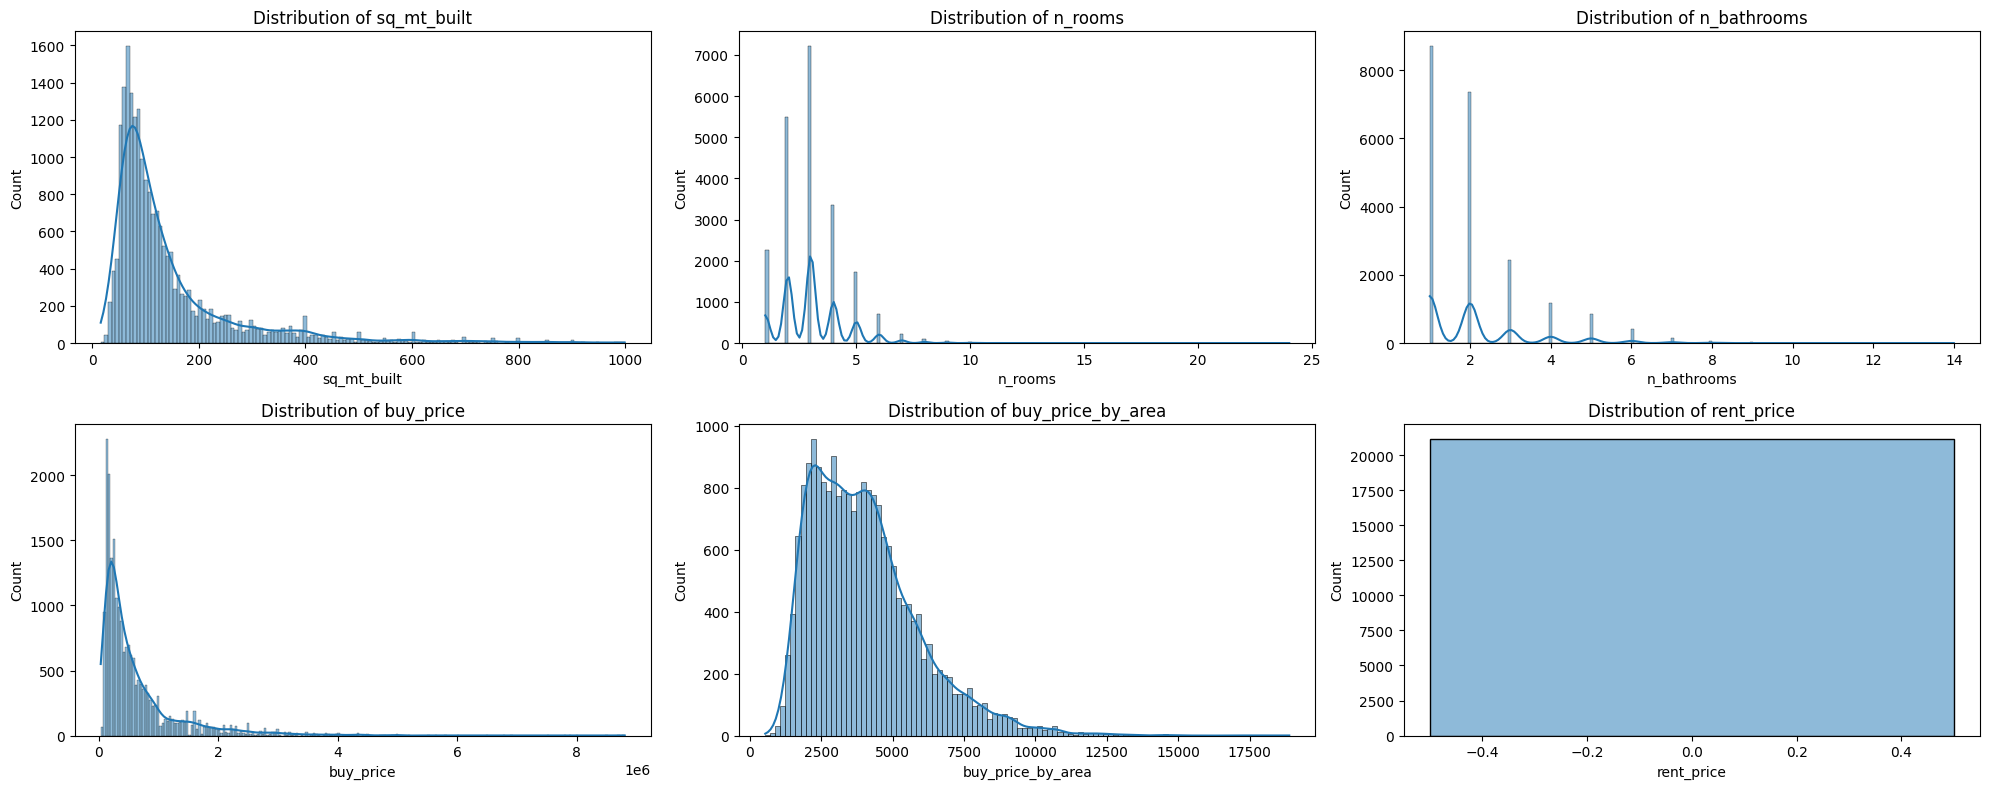

In [42]:
plt.figure(figsize=(20,8))
for e,i in enumerate (df.columns[1:7]):
    plt.subplot(2,3,e+1)
    plt.title('Distribution of '+i)
    sns.histplot(df[i],kde=True)
    plt.tight_layout()
    


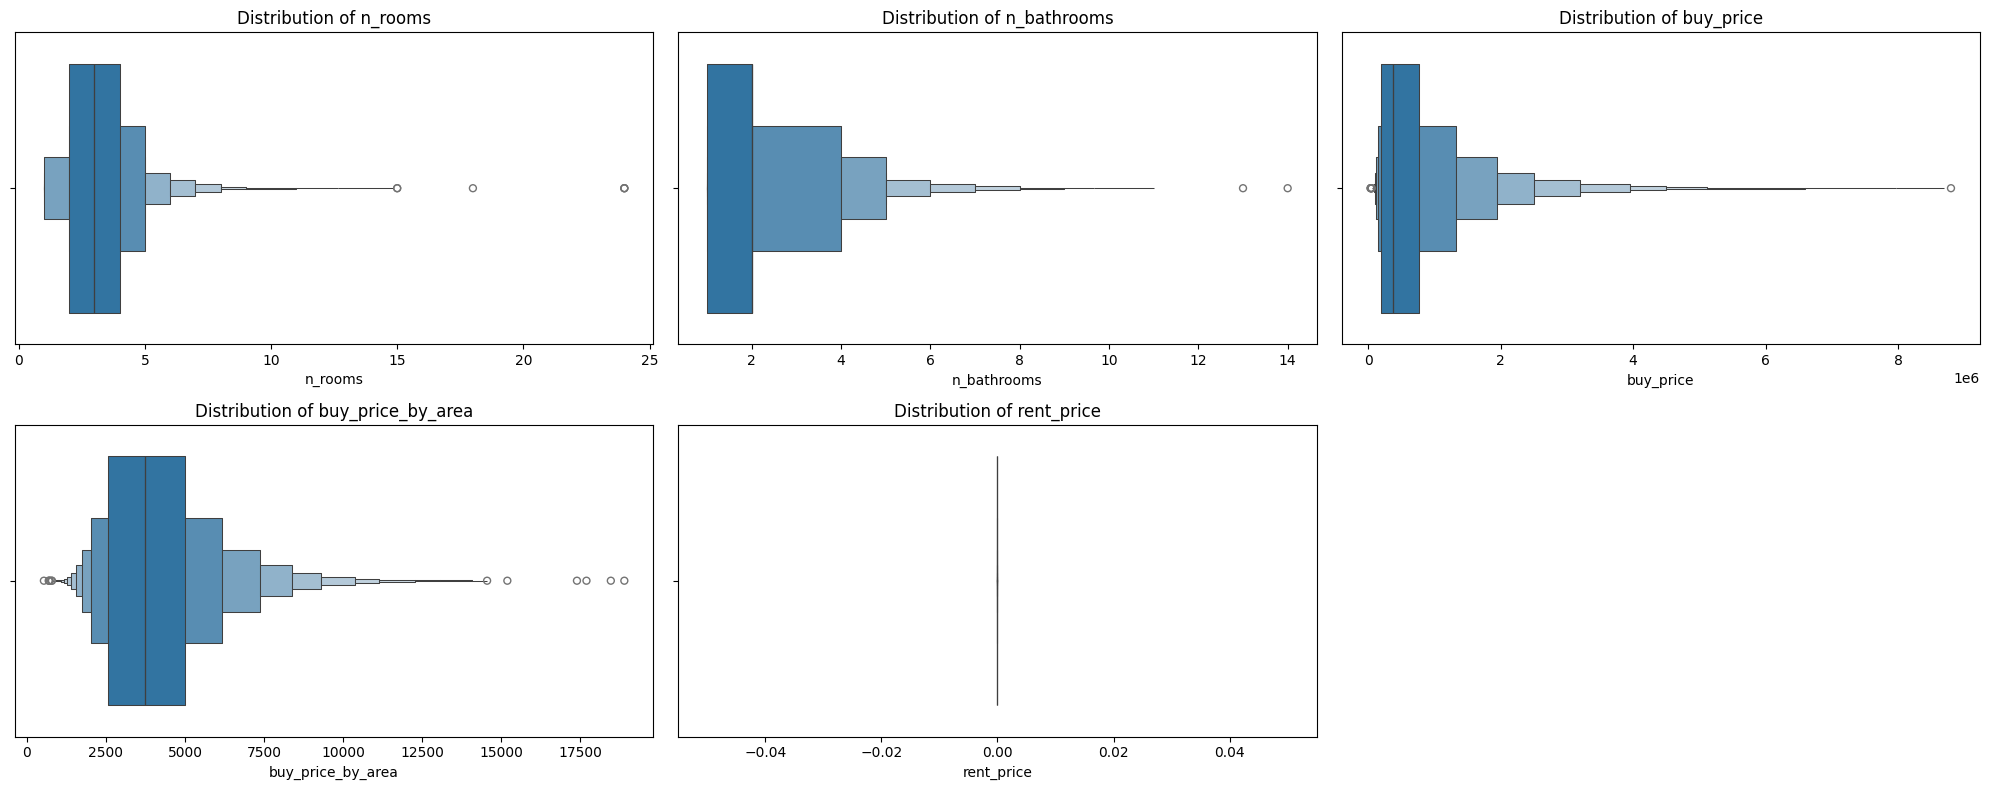

In [43]:
plt.figure(figsize=(20,8))
for e,i in enumerate (df.columns[2:7]):
    plt.subplot(2,3,e+1)
    plt.title('Distribution of '+i)
    sns.boxenplot(x=df[i])
    plt.tight_layout()

In [44]:
px.bar(df.country.value_counts())

BI

In [45]:
df.columns

Index(['id', 'sq_mt_built', 'n_rooms', 'n_bathrooms', 'buy_price',
       'buy_price_by_area', 'rent_price', 'country'],
      dtype='object')

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

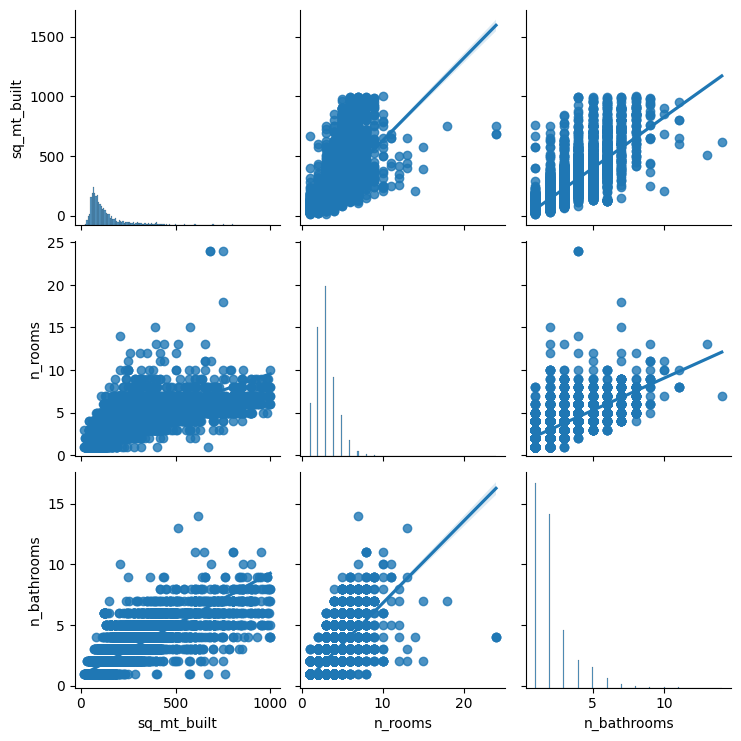

In [46]:
corrr=df[['sq_mt_built','n_rooms','n_bathrooms']]

sns.pairplot(corrr,kind='reg')
plt.tight_layout

Text(0, 0.5, 'buy price')

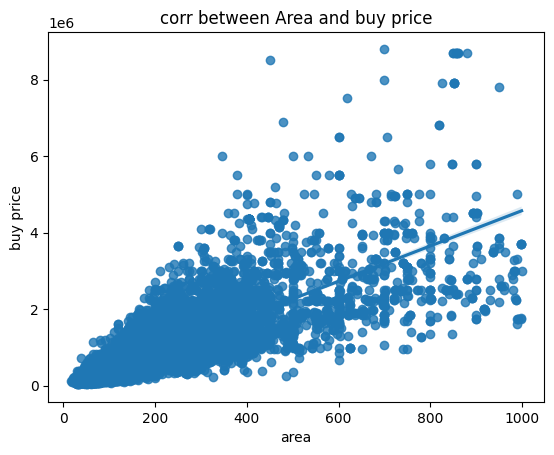

In [47]:
sns.regplot(data=df,x='sq_mt_built',y='buy_price')
plt.title('corr between Area and buy price')
plt.xlabel('area')
plt.ylabel('buy price')


<Axes: >

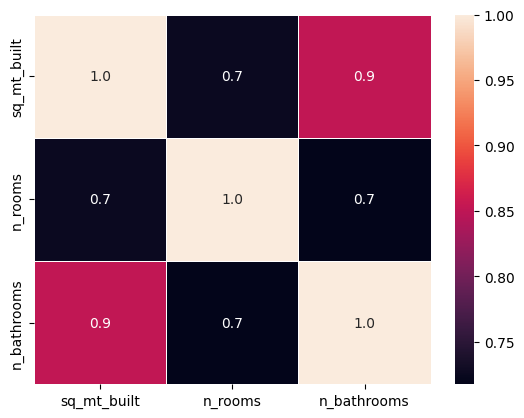

In [48]:
sns.heatmap(corrr.corr(),annot=True,fmt='0.1f',linewidths=0.5)

<Axes: title={'center': 'mean price by country'}, xlabel='country', ylabel='buy price'>

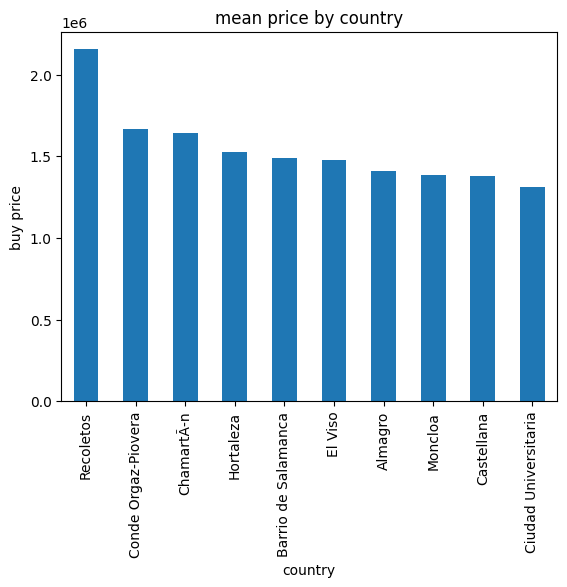

In [49]:
mean_price=df.groupby('country')['buy_price'].mean().round(2).sort_values(ascending=False)
mean_price.head(10).plot(kind='bar',xlabel='country',ylabel='buy price',title='mean price by country')

<Axes: title={'center': 'mean price by country'}, xlabel='country', ylabel='buy price'>

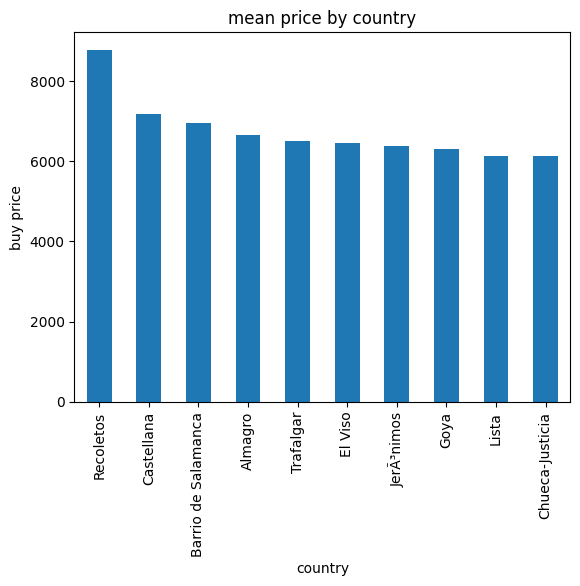

In [50]:
mean_price=df.groupby('country')['buy_price_by_area'].mean().round(2).sort_values(ascending=False)
mean_price.head(10).plot(kind='bar',xlabel='country',ylabel='buy price',title='mean price by country')

In [51]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21177 entries, 0 to 21741
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21177 non-null  int64  
 1   sq_mt_built        21177 non-null  float64
 2   n_rooms            21177 non-null  int64  
 3   n_bathrooms        21177 non-null  int32  
 4   buy_price          21177 non-null  int64  
 5   buy_price_by_area  21177 non-null  int64  
 6   rent_price         21177 non-null  int64  
 7   country            21177 non-null  object 
dtypes: float64(1), int32(1), int64(5), object(1)
memory usage: 1.4+ MB


In [53]:
df.columns

Index(['id', 'sq_mt_built', 'n_rooms', 'n_bathrooms', 'buy_price',
       'buy_price_by_area', 'rent_price', 'country'],
      dtype='object')

Create Model 

In [54]:
reco=df.query('country == "Recoletos"')

In [55]:
reco.sample(5)

,id,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,rent_price,country
19336,2406,471.0,6,6,4155000,8822,0,Recoletos
20139,1603,130.0,3,2,1120000,8615,0,Recoletos
19244,2498,63.0,1,1,510000,8095,0,Recoletos
19702,2040,706.0,6,7,6500000,9207,0,Recoletos
19867,1875,279.0,4,4,2200000,7885,0,Recoletos


In [56]:
import statsmodels.api as sm

reco['intercept']=1
lm=sm.OLS(reco['buy_price'],reco[['intercept','sq_mt_built']])
result=lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              buy_price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     555.1
Date:                Sat, 29 Jun 2024   Prob (F-statistic):           5.30e-45
Time:                        23:42:44   Log-Likelihood:                -1654.1
No. Observations:                 113   AIC:                             3312.
Df Residuals:                     111   BIC:                             3318.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept   -4.342e+04   1.07e+05     -0.406      0.686   -2.55e+05    1.69e+05
sq_mt_built  8975.6204    380.945     23.561      0.000    8220.753    9730.488
==============================================================================
Omnibus:                       11.498   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               16.048
Skew:                           0.512   Prob(JB):                     0.000328
Kurtosis:                       4.536   Cond. No.                         574.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
x=300
price=-4.3420+8975.62*300
print(price)

2692681.6580000003


MultiLinear Regression model

In [59]:
df.head(5)

,id,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,rent_price,country
0,21742,64.0,2,1,85000,1328,0,San CristÃ³bal
1,21741,70.0,3,1,129900,1856,0,Los Ãngeles
2,21740,94.0,2,2,144247,1535,0,San AndrÃ©s
3,21739,64.0,2,1,109900,1717,0,San AndrÃ©s
4,21738,108.0,2,2,260000,2407,0,Los Rosales


In [60]:
df.columns

Index(['id', 'sq_mt_built', 'n_rooms', 'n_bathrooms', 'buy_price',
       'buy_price_by_area', 'rent_price', 'country'],
      dtype='object')

In [61]:
corer=df[['sq_mt_built', 'n_rooms', 'n_bathrooms', 'buy_price']]

<Axes: >

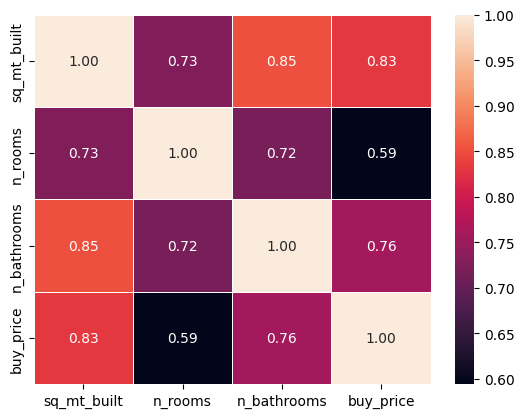

In [62]:
sns.heatmap(corer.corr(),annot=True,fmt='.2f',linewidths=.5)

In [63]:
lm=sm.OLS(reco['buy_price'],reco[['intercept','sq_mt_built','n_rooms','n_bathrooms']])
result=lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              buy_price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sat, 29 Jun 2024   Prob (F-statistic):           2.69e-48
Time:                        23:56:29   Log-Likelihood:                -1639.7
No. Observations:                 113   AIC:                             3287.
Df Residuals:                     109   BIC:                             3298.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    1.068e+05   1.29e+05      0.828      0.409   -1.49e+05    3.62e+05
sq_mt_built  9686.1051    622.560     15.559      0.000    8452.212    1.09e+04
n_rooms     -2.292e+05   5.01e+04     -4.573      0.000   -3.29e+05    -1.3e+05
n_bathrooms  1.679e+05   4.41e+04      3.804      0.000    8.04e+04    2.55e+05
==============================================================================
Omnibus:                       13.677   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.442
Skew:                           0.517   Prob(JB):                     8.12e-06
Kurtosis:                       4.977   Cond. No.                         804.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
x=300
bath=3
room=2
price=1.06800000+9686.1051*300+-2.29200000*3+1.67900000*2
print(price)

2905829.08


Dummy Variables

In [67]:
df.country.nunique()

146

In [69]:
df_dummy=df.query('country in ("Recoletos","Castellana","Trafalgar")')
df_dummy.head(5)

,id,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,rent_price,country
10937,10805,68.0,2,1,510000,7500,0,Trafalgar
11000,10742,103.0,2,2,980000,9515,0,Trafalgar
11001,10741,103.0,2,2,960000,9320,0,Trafalgar
11010,10732,95.0,4,1,239000,2516,0,Trafalgar
11042,10700,67.0,2,2,550000,8209,0,Trafalgar


In [70]:
pd.get_dummies(df_dummy.country).head()

,Castellana,Recoletos,Trafalgar
10937,False,False,True
11000,False,False,True
11001,False,False,True
11010,False,False,True
11042,False,False,True


In [73]:
df_dummy[['cas','reco','traf']]=pd.get_dummies(df_dummy['country'],dtype='int')

In [74]:
df_dummy.head()

,id,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,rent_price,country,cas,reco,traf
10937,10805,68.0,2,1,510000,7500,0,Trafalgar,0,0,1
11000,10742,103.0,2,2,980000,9515,0,Trafalgar,0,0,1
11001,10741,103.0,2,2,960000,9320,0,Trafalgar,0,0,1
11010,10732,95.0,4,1,239000,2516,0,Trafalgar,0,0,1
11042,10700,67.0,2,2,550000,8209,0,Trafalgar,0,0,1


In [75]:
df_dummy['intercept']=1
lm=sm.OLS(df_dummy.buy_price,df_dummy[['intercept','cas','traf']])
result=lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              buy_price   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     114.3
Date:                Sun, 30 Jun 2024   Prob (F-statistic):           5.20e-40
Time:                        00:17:43   Log-Likelihood:                -6095.1
No. Observations:                 404   AIC:                         1.220e+04
Df Residuals:                     401   BIC:                         1.221e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.155e+06   8.15e+04     26.448      0.000    1.99e+06    2.32e+06
cas        -7.785e+05   1.27e+05     -6.129      0.000   -1.03e+06   -5.29e+05
traf       -1.513e+06   1.01e+05    -14.998      0.000   -1.71e+06   -1.31e+06
==============================================================================
Omnibus:                      158.066   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              761.523
Skew:                           1.636   Prob(JB):                    4.34e-166
Kurtosis:                       8.876   Cond. No.                         4.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
df_dummy['intercept']=1
lm=sm.OLS(df_dummy.buy_price,df_dummy[['intercept','cas','traf','sq_mt_built']])
result=lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              buy_price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     859.3
Date:                Sun, 30 Jun 2024   Prob (F-statistic):          6.30e-174
Time:                        00:18:57   Log-Likelihood:                -5780.8
No. Observations:                 404   AIC:                         1.157e+04
Df Residuals:                     400   BIC:                         1.159e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    2.774e+05   6.13e+04      4.524      0.000    1.57e+05    3.98e+05
cas         -3.712e+05   5.93e+04     -6.254      0.000   -4.88e+05   -2.55e+05
traf        -4.262e+05   5.42e+04     -7.859      0.000   -5.33e+05    -3.2e+05
sq_mt_built  7665.9496    198.152     38.687      0.000    7276.400    8055.500
==============================================================================
Omnibus:                      119.712   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              724.118
Skew:                           1.112   Prob(JB):                    5.75e-158
Kurtosis:                       9.170   Cond. No.                         881.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21177 entries, 0 to 21741
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21177 non-null  int64  
 1   sq_mt_built        21177 non-null  float64
 2   n_rooms            21177 non-null  int64  
 3   n_bathrooms        21177 non-null  int32  
 4   buy_price          21177 non-null  int64  
 5   buy_price_by_area  21177 non-null  int64  
 6   rent_price         21177 non-null  int64  
 7   country            21177 non-null  object 
dtypes: float64(1), int32(1), int64(5), object(1)
memory usage: 1.4+ MB


In [78]:
df.drop(columns='country',inplace=True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21177 entries, 0 to 21741
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21177 non-null  int64  
 1   sq_mt_built        21177 non-null  float64
 2   n_rooms            21177 non-null  int64  
 3   n_bathrooms        21177 non-null  int32  
 4   buy_price          21177 non-null  int64  
 5   buy_price_by_area  21177 non-null  int64  
 6   rent_price         21177 non-null  int64  
dtypes: float64(1), int32(1), int64(5)
memory usage: 1.2 MB
